In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from plots import *
from math import sqrt
# latexify(fig_width = 10)

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

rc('font', **{'family': 'sans-serif',
              'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 12,
          'legend.fontsize': 12,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': True,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_style("ticks")

In [3]:
xls = pd.ExcelFile("Final Plotting/Experiment - 1.xlsx")

In [4]:
df1 = pd.read_excel(xls, sheet_name="VGG", index_col=0)
df2 = pd.read_excel(xls, sheet_name="ResNet", index_col = 0)

# VGG Plotting

In [5]:
df1.head()

,Unnamed: 1,Accuracy on CIFAR10-B,Unnamed: 3,Unnamed: 4
NaN,Percentage of Weights Prune,CIFAR10-A,Random,CIFAR10-B
0.0,0,82.14,81.71,89.2
1.0,20,82.636,80.78,89.956
2.0,36,82.22,79.41,89.52
3.0,48.8,82.204,75.74,89.204


In [6]:
df1 = df1.rename(columns = {"Unnamed: 1":"% Pruned", "Accuracy of CIFAR10-B":"CIFAR-10A", "Unnamed: 3":"Random", "Unnamed: 4":"CIFAR10-B"})

In [7]:
df1 = df1.iloc[1:]

In [8]:
df1.dropna(inplace = True)

In [9]:
x = np.float64(df1["% Pruned"].values)
cifar_a = np.float64(df1["Accuracy on CIFAR10-B"].values)
cifar_b = np.float64(df1["CIFAR10-B"].values)
rd = np.float64(df1["Random"].values)

In [10]:
idx_vals = [0,20,36,48.8,59.04,67.23,73.79,86.58,93.13,96.48,98.2,99.08,99.53,99.81,99.88]
idx = []
for i in range(len(x)):
    for j in range(len(idx_vals)):
        if x[i] == idx_vals[j]:
            idx.append(i)
idx.sort()

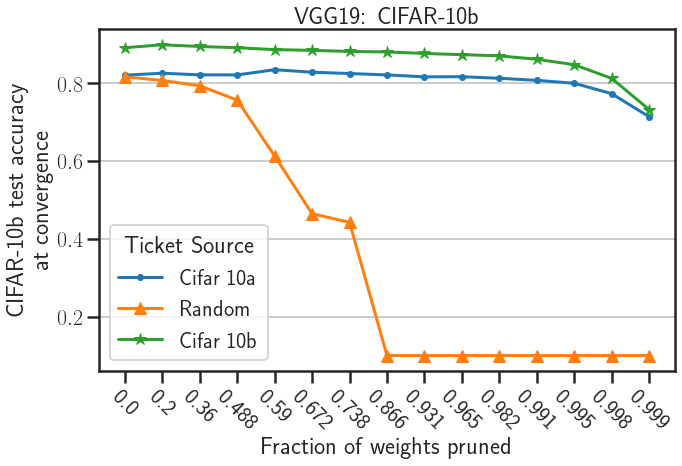

In [11]:
plt.figure(figsize=(10,7))
plt.plot([i for i in range(len(idx))], [cifar_a[i]/100 for i in idx], label='Cifar 10a', marker = '.')
plt.plot([i for i in range(len(idx))], [rd[i]/100 for i in idx], label="Random", marker='^')
plt.plot([i for i in range(len(idx))], [cifar_b[i]/100 for i in idx], label='Cifar 10b', marker='*')
plt.title("VGG19: CIFAR-10b")
plt.xlabel("Fraction of weights pruned")
plt.ylabel("CIFAR-10b test accuracy\n at convergence")
tick_lbls = [np.round(x[i]/100, 3) for i in idx]
plt.xticks(range(len(idx)), tick_lbls, rotation = -45)
plt.grid(axis='y')
plt.legend(loc="best",title="Ticket Source")
plt.tight_layout()
plt.savefig("finalplots/Exp1_VGG_N.pdf")

# ResNet 50 Plotting

In [12]:
df2.head()

,Unnamed: 1,Accuracy on CIFAR10-B,Unnamed: 3,Unnamed: 4
NaN,Percentage of Weights Prune,CIFAR10-A,Random,CIFAR10-B
0.0,0,48.304,48.476,48.476
1.0,20,55.7,55.06,49.028
2.0,36,57.396,64.184,48.012
3.0,48.8,55.78,62.176,51.332


In [13]:
df2 = df2.rename(columns = {"Unnamed: 1":"% Pruned", "Accuracy of CIFAR10-B":"CIFAR-10A", "Unnamed: 3":"Random", "Unnamed: 4":"CIFAR10-B"})

In [14]:
df2 = df2.iloc[1:]

In [15]:
df2.dropna(inplace = True)

In [16]:
x = np.float64(df2["% Pruned"].values)
cifar_a = np.float64(df2["Accuracy on CIFAR10-B"].values)
cifar_b = np.float64(df2["CIFAR10-B"].values)
rd = np.float64(df2["Random"].values)

In [17]:
idx_vals = [0,20,36,48.8,59.04,67.23,73.79,86.58,93.13,96.48,98.2,99.08,99.53,99.81,99.88]
idx = []
for i in range(len(x)):
    for j in range(len(idx_vals)):
        if x[i] == idx_vals[j]:
            idx.append(i)
idx.sort()

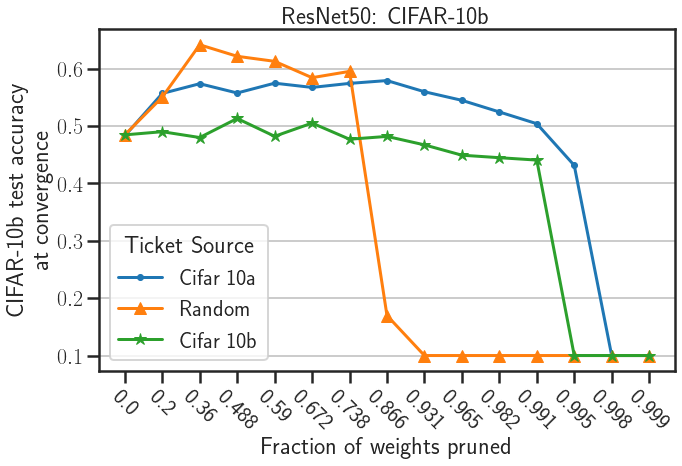

In [19]:
plt.figure(figsize=(10,7))
plt.plot([i for i in range(len(idx))], [cifar_a[i]/100 for i in idx], label='Cifar 10a', marker = '.')
plt.plot([i for i in range(len(idx))], [rd[i]/100 for i in idx], label="Random", marker='^')
plt.plot([i for i in range(len(idx))], [cifar_b[i]/100 for i in idx], label='Cifar 10b', marker='*')
plt.title("ResNet50: CIFAR-10b")
plt.xlabel("Fraction of weights pruned")
plt.ylabel("CIFAR-10b test accuracy\n at convergence")
tick_lbls = [np.round(x[i]/100, 3) for i in idx]
plt.xticks(range(len(idx)), tick_lbls, rotation = -45)
plt.grid(axis='y')
plt.legend(loc="best",title="Ticket Source")
plt.tight_layout()
plt.savefig("finalplots/Exp1_ResNet_N.pdf")

## MAY BE NEEDED _ DO NOT DELETE

In [19]:
# df = pd.read_excel("Experiment - 3.xlsx", index_col=0)

# df.head()

# # df = df.rename(columns = {"Unnamed: 1":"% Pruned", "Accuracy of CIFAR10-B":"CIFAR-10A", "Unnamed: 3":"Random", "Unnamed: 4":"CIFAR10-B"})

# # df = df.iloc[1:]
# # 
# df = df.rename(columns = {"Unnamed: 1":"% Pruned", "Accuracy on CIFAR10":"Adam after SGD", "Unnamed: 3":"SGD after Adam", "Unnamed: 4":"SGD after SGD", "Unnamed: 5":"Adam after Adam", "Unnamed: 6":"Random(SGD WM)", "Unnamed: 7":"Random(Adam WM)"})
# df.dropna(inplace = True)

# # x = np.float64(df["% Pruned"].values)
# # cifar_a = np.float64(df["Accuracy on CIFAR10-B"].values)
# # cifar_b = np.float64(df["CIFAR10-B"].values)
# # rd = np.float64(df["Random"].values)

# # plt.figure(figsize=(15,7))
# # plt.plot([i for i in range(31)], cifar_a, label='Cifar 10a', marker = '.')
# # plt.plot([i for i in range(31)], rd, label="Random (WM)", marker='^')
# # plt.plot([i for i in range(31)], cifar_b, label='Cifar 10b', marker='*')
# # plt.xlabel("Pruning Percentage")
# # plt.ylabel("Accuracy")
# # tick_lbls = [i for i in x]
# # plt.xticks(range(31), tick_lbls, rotation = 90)
# # plt.grid(axis='y')
# # plt.legend(loc="best")
# # format_axes(plt.gca())
# # # plt.savefig("Exp3.pdf")

In [20]:
# df.head(2)

In [21]:
# df

In [22]:
# df = df.iloc[1:]
# df.dropna(inplace = True)
# x = np.float64(df["% Pruned"].values)
# adam_after_sgd = np.float64(df["Adam after SGD"].values)
# sgd_after_adam = np.float64(df["SGD after Adam"].values)
# sgd_after_sgd = np.float64(df["SGD after SGD"].values)
# adam_after_adam = np.float64(df["Adam after Adam"].values)
# random_sgd = np.float64(df["Random(SGD WM)"].values)
# random_adam = np.float64(df["Random(Adam WM)"].values)

# # rd = np.float64(df["Random"].values)

# plt.figure(figsize=(15,7))
# plt.plot([i for i in range(len(x))], adam_after_sgd, label='Adam after SGD', marker = '.')
# plt.plot([i for i in range(len(x))], sgd_after_sgd, label='SGD after SGD', marker='*')
# plt.plot([i for i in range(len(x))], random_sgd, label='Random (SGD WM)', marker='^')


# # plt.plot([i for i in range(len(x))], sgd_after_adam, label="SGD after Adam", marker='.')
# # plt.plot([i for i in range(len(x))], adam_after_adam, label='Adam after Adam', marker='*')
# # plt.plot([i for i in range(len(x))], random_adam, label='Random (Adam WM)', marker='^')


# plt.xlabel("Pruning Percentage")
# plt.ylabel("Accuracy")
# tick_lbls = [i for i in x]
# plt.xticks(range(len(x)), tick_lbls, rotation = 90)
# plt.grid(axis='y')
# plt.legend(loc="best")
# format_axes(plt.gca())
# # plt.savefig("Exp3_WM_SGD.pdf")

In [23]:
# df

In [24]:
# df = pd.read_excel("Experiment - 3.xlsx", index_col=0)

# df.head()
